In [1]:
# -*- coding: utf-8 -*-
# Regression Example With Boston Dataset: Standardized and Wider
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras import layers
from sklearn.utils import shuffle

import pandas as pd
import seaborn as sns
import keras
import keras.utils
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


from cgi import test



C:\Users\junai\AppData\Roaming\Python\Python39\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [19]:
dataset = pd.read_csv('aggregated_data-tmp.csv')
dataset = shuffle(dataset)

std_scaler = StandardScaler()

train_dataset = dataset.sample(frac=0.8, random_state=3)
test_dataset = dataset.drop(train_dataset.index)


train_features = train_dataset.copy()
test_features = test_dataset.copy()


train_labels = train_features.pop('Concentration')
test_labels = test_features.pop('Concentration')

train_features = std_scaler.fit_transform(train_features.to_numpy())
dict = {'Time':train_features[:, 0], 'Current':train_features[:, 1], 'Spin Coating':train_features[:, 2] ,'Increaing PPM':train_features[:, 3], 'Temperature':train_features[:, 4], 'Repeat Sensor Use':train_features[:, 5], 'Days Elapsed':train_features[:, 6]}
train_features = pd.DataFrame(dict)

test_features = std_scaler.fit_transform(test_features.to_numpy())
dict = {'Time':test_features[:, 0], 'Current':test_features[:, 1], 'Spin Coating':test_features[:, 2] ,'Increaing PPM':test_features[:, 3], 'Temperature':test_features[:, 4], 'Repeat Sensor Use':test_features[:, 5], 'Days Elapsed':test_features[:, 6]}
test_features = pd.DataFrame(dict)

#For later use
data_labels = dataset.pop('Concentration')

In [3]:

#sns.pairplot(train_dataset[['Time','Current', 'Spin Coating', 'Increasing PPM', 'Temperature', 'Repeat Sensor Use', 'Days Elapsed', 'Concentration']], diag_kind='kde')

#train_dataset = std_scaler.fit_transform(train_dataset.to_numpy())
#dict = {'Time':train_dataset[:, 0],'Current':train_dataset[:, 1], 'Spin Coating':train_dataset[:, 2] ,'Increasing PPM':train_dataset[:, 3], 'Temperature':train_dataset[:, 4], 'Repeat Sensor Use':train_dataset[:, 5], 'Days Elapsed':train_dataset[:, 6], 'Concentration':train_dataset[:, 7] }
#train_dataset = pd.DataFrame(dict)

#test_dataset = std_scaler.transform(test_dataset)
#dict2 = {'Time':test_dataset[:, 0],'Current':test_dataset[:, 1], 'Spin Coating':test_dataset[:, 2] ,'Increasing PPM':test_dataset[:, 3], 'Temperature':test_dataset[:, 4], 'Repeat Sensor Use':test_dataset[:, 5], 'Days Elapsed':test_dataset[:, 6], 'Concentration':test_dataset[:, 7] }
#test_dataset = pd.DataFrame(dict2)

In [4]:
#Iterate through this a few dozen times

def build_model(n1, n2):
  #Experiment with different models, thicknesses, layers, activation functions; Don't limit to only 10 nodes; Measure up to 64 nodes in 2 layers
  model = keras.Sequential([
    layers.Dense(n1, activation=tf.nn.relu, input_shape=[len(train_features.keys())]),
    layers.Dense(n2, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])
  #Prepares model for training. Can use an optimizer
  #Change the different
  #model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse'])
  #adam optimizer performs gradient descent


  early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

  return model

def model_history(features, labels, model, epo, batch, vbs):
  
    history = model.fit(
        features, labels,
        epochs=epo, batch_size=batch, validation_split=0.2, verbose=vbs #, callbacks=early_stop
    )

    hist = pd.DataFrame(history.history)
    
    return hist



In [5]:


def plot_loss(history):

  plt.plot(history['loss'], label='loss')
  plt.plot(history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
  plt.show()

def correlation_plots(model, label, input_data, title, xlabel, ylabel):
#test_loss, test_acc = model.evaluate(test_features, test_labels, verbose = 1)

  test_predictions = model.predict(input_data).flatten()
  plt.scatter(label,test_predictions)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.axis('equal')
  plt.axis('square')
  plt.grid(True)
  plt.show()
  return test_predictions


def plotGraph(y_test, y_pred,regressorName):
    plt.scatter(range(len(y_pred)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return




first hidden layer 32
second hidden layer 32
processing fold # 0
215/215 [==============================] - 0s 1ms/step - loss: 0.3496 - mae: 0.4483 - mse: 0.3496


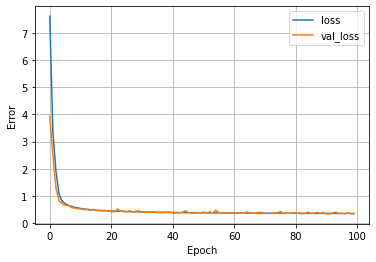

processing fold # 1
215/215 [==============================] - 0s 1ms/step - loss: 0.3449 - mae: 0.4267 - mse: 0.3449


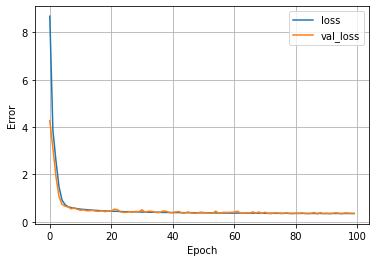

processing fold # 2
215/215 [==============================] - 0s 1ms/step - loss: 0.4074 - mae: 0.4517 - mse: 0.4074


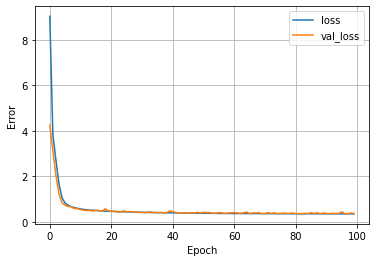

processing fold # 3
215/215 [==============================] - 0s 1ms/step - loss: 0.3727 - mae: 0.4498 - mse: 0.3727


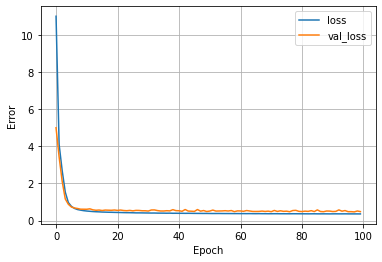

215/215 [==============================] - 0s 855us/step


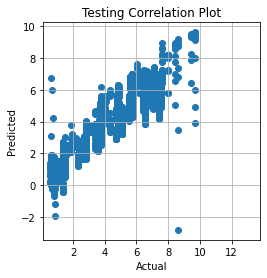

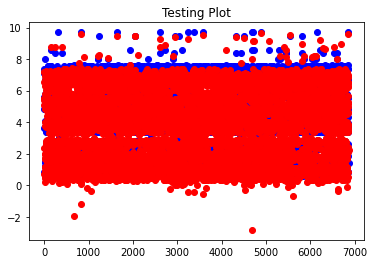

859/859 [==============================] - 1s 829us/step


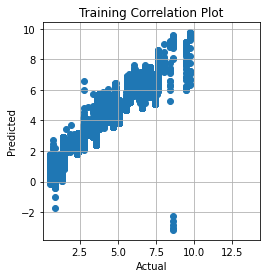

first hidden layer 32
second hidden layer 33
processing fold # 0
215/215 [==============================] - 0s 1ms/step - loss: 0.3669 - mae: 0.4564 - mse: 0.3669


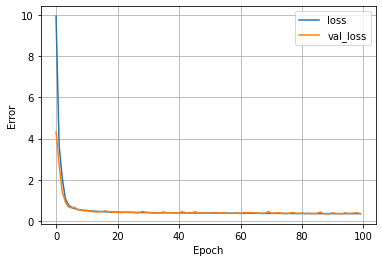

processing fold # 1
215/215 [==============================] - 0s 1ms/step - loss: 0.3575 - mae: 0.4344 - mse: 0.3575


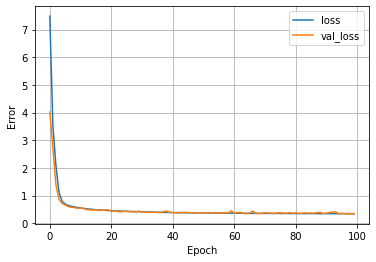

processing fold # 2
215/215 [==============================] - 0s 1ms/step - loss: 0.4268 - mae: 0.4413 - mse: 0.4268


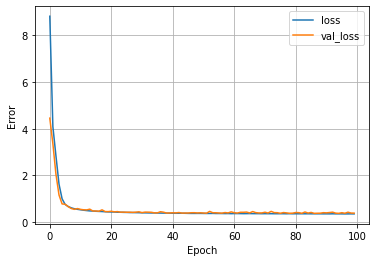

processing fold # 3
215/215 [==============================] - 0s 1ms/step - loss: 0.3469 - mae: 0.4298 - mse: 0.3469


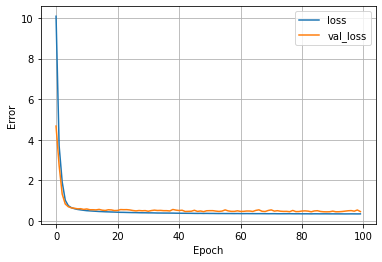

215/215 [==============================] - 0s 869us/step


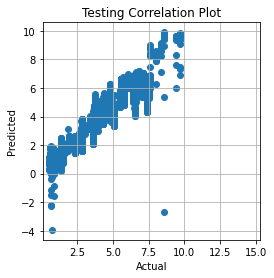

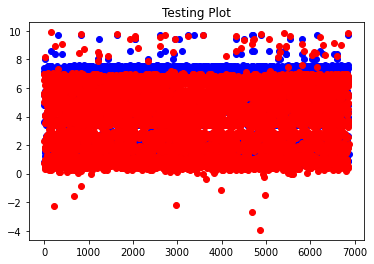

859/859 [==============================] - 1s 856us/step


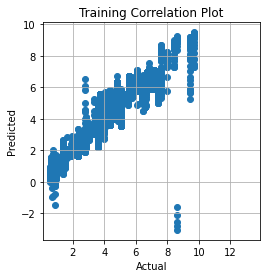

first hidden layer 33
second hidden layer 32
processing fold # 0
215/215 [==============================] - 0s 1ms/step - loss: 0.3465 - mae: 0.4273 - mse: 0.3465


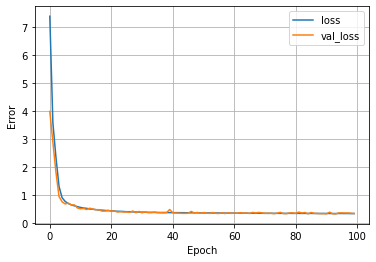

processing fold # 1
215/215 [==============================] - 0s 1ms/step - loss: 0.3737 - mae: 0.4390 - mse: 0.3737


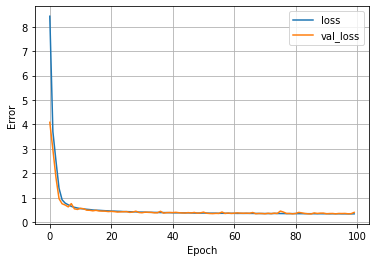

processing fold # 2
215/215 [==============================] - 0s 1ms/step - loss: 0.3737 - mae: 0.4218 - mse: 0.3737


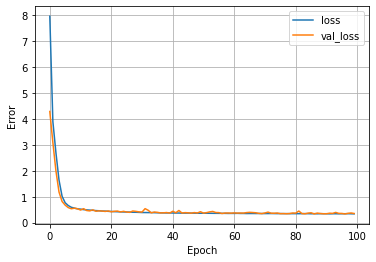

processing fold # 3
215/215 [==============================] - 0s 1ms/step - loss: 0.3604 - mae: 0.4315 - mse: 0.3604


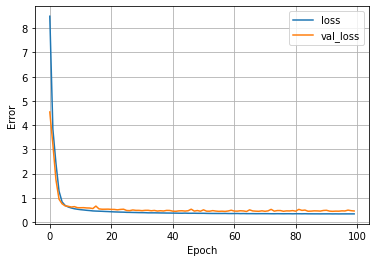

215/215 [==============================] - 0s 883us/step


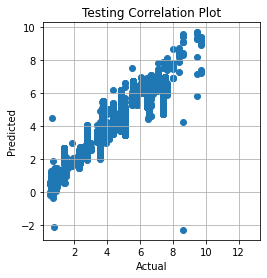

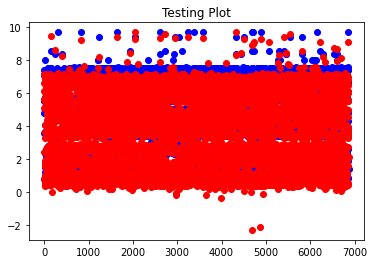

859/859 [==============================] - 1s 778us/step


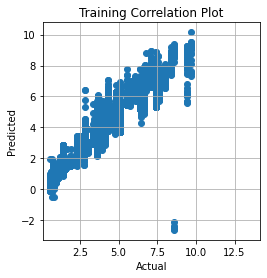

In [6]:
def KCrossValidation(i, features, labels, num_val_samples, epochs, batch, verbose, n1, n2):

    print('processing fold #', i)
    val_data = features[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = labels[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([features[:i * num_val_samples], features[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(     [labels[:i * num_val_samples], labels[(i + 1) * num_val_samples:]],     axis=0)

    model = build_model(n1, n2)

    history = model_history(partial_train_data, partial_train_targets, model, epochs, batch, verbose)

    test_loss, test_mae, test_mse = model.evaluate(val_data, val_targets, verbose=1)

    return model, history, test_loss, test_mae, test_mse

import numpy as np
k_folds = 4
num_val_samples = len(train_labels) // k_folds

sum_nodes = 65
num_epochs = 100
batch_size = 100
verbose = 0
avg_val_scores = []
order_of_architecture = []

all_networks  = []
all_history  = []
mae_history = []



#(TAKEN FROM DEEP LEARNING WITH PYTHON BY MANNING)
for i in range(32, sum_nodes):

    for j in range(32, sum_nodes):
        if (i+j > sum_nodes):
            continue
        
        print("first hidden layer", i)
        print("second hidden layer", j)
        k_fold_test_scores = []
        k_models = []
        k_history = []

        k_mae_history = []

        for fold in range(k_folds):
            model, history, test_loss, test_mae, test_mse = KCrossValidation(
                fold, 
                train_features, 
                train_labels, 
                num_val_samples, 
                num_epochs, 
                batch_size, 
                verbose, 
                j, 
                i)

            plot_loss(history)
            k_fold_test_scores.append(test_mae)
            k_history.append(history)
            k_models.append(model)
            k_mae_history.append(history['val_mae'])


        avg_val_scores.append(sum(k_fold_test_scores)/len(k_fold_test_scores))
        all_history.append(k_history)
        all_networks.append(k_models)

        
        mae_history.append([ np.mean([x[i] for x in k_mae_history]) for i in range(num_epochs)])


        order_of_architecture.append([i, j])


        test_predictions = correlation_plots(model, test_labels, test_features, "Testing Correlation Plot", "Actual", "Predicted")
        plotGraph(test_labels, test_predictions, "Testing Plot")


        training_predictions = correlation_plots(model, train_labels, train_features, "Training Correlation Plot", "Actual", "Predicted")
        #plotGraph(train_labels, training_predictions, "Training Plot")




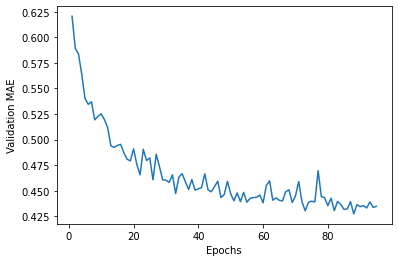

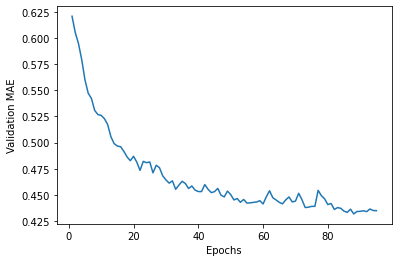

In [7]:
def smooth_curve(points, factor=0.5):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Find the model with the lowest error
k_folds = 4
lowest_index = avg_val_scores.index(min(avg_val_scores))
optimal_NNs = all_networks[lowest_index]

#print(mae_history)
# Find the history of that model, and display it
for i in range(k_folds):
    x = all_history[lowest_index][i]['val_mae']

   # print(x)
plt.plot(range(1, len(mae_history[lowest_index][5:]) + 1), mae_history[lowest_index][5:])
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

smooth_mae_history = smooth_curve(mae_history[lowest_index][5:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


In [20]:


# Split the data labels with spin coating 0 and 1
sc_index = [np.where(dataset['Spin Coating'].to_numpy()  == 0)[0], np.where(dataset['Spin Coating'].to_numpy()  == 1)[0]]


dataset = std_scaler.fit_transform(dataset.to_numpy())
dict = {'Time':dataset[:, 0], 'Current':dataset[:, 1], 'Spin Coating':dataset[:, 2] ,'Increaing PPM':dataset[:, 3], 'Temperature':dataset[:, 4], 'Repeat Sensor Use':dataset[:, 5], 'Days Elapsed':dataset[:, 6]}
dataset = pd.DataFrame(dict)

#The full features of the data points that use Spin Coating
sc_features = [dataset.iloc[sc_index[0]], dataset.iloc[sc_index[1]]]


#The stupid labels for Spin coating vs. not Spin coating
sc_label = [data_labels.to_numpy()[sc_index[0]], data_labels.to_numpy()[sc_index[1]]]



sc_mae = []
for NN in optimal_NNs:

    tmp_mae = []
    for i in range(0, 2):
        test_loss, test_mae, test_mse = model.evaluate(sc_features[i], sc_label[i],batch_size=5,  verbose=1)
        tmp_mae.append(test_mae)


    sc_mae.append(tmp_mae)

print(tmp_mae)
#train_labels = train_features.pop('Concentration')
#test_labels = test_features.pop('Concentration')

# Split the data labels according to time
# CREATE 3D MODELS OF THE VARIOUS PARAMETERS

[array([    0,     1,     2, ..., 34323, 34324, 34325], dtype=int64), array([  124,   148,   203,   285,   296,   423,   491,   513,   595,
         630,   655,   692,  1385,  1426,  1480,  1515,  1550,  1617,
        1734,  1888,  2069,  2098,  2105,  2179,  2215,  2230,  2473,
        2529,  2587,  2596,  2724,  2747,  2750,  2763,  3017,  3115,
        3371,  3493,  3499,  3589,  3618,  3628,  3813,  3894,  3907,
        3946,  3958,  3969,  3990,  4041,  4072,  4107,  4137,  4191,
        4227,  4238,  4240,  4244,  4286,  4356,  4441,  4475,  4736,
        4847,  4980,  5291,  5440,  5441,  5727,  5748,  5830,  5986,
        6013,  6158,  6311,  6357,  6435,  6474,  6510,  6603,  6770,
        6957,  6980,  7037,  7099,  7132,  7318,  7458,  7499,  7501,
        7832,  7961,  8009,  8036,  8048,  8076,  8117,  8145,  8180,
        8222,  8239,  8248,  8303,  8441,  8517,  8595,  8647,  8782,
        8803,  8808,  8816,  8945,  9176,  9235,  9238,  9362,  9450,
        9456,  9757,